# Data Visualization with Haberman Dataset

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [29]:
haberman = pd.read_csv(r"C:\Users\sai karthik\PycharmProjects\OFFICE\APPLIED_AI\datasets\haberman.csv")

In [30]:
print(haberman.shape)
haberman.head(10)

(306, 4)


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [31]:
# features of haberman dataset 
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [32]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation:

Classlabel "Status" has two unique values(i.e 1,2), but are highly unbalanced.

In [33]:
haberman.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


## 2-D scatter plot

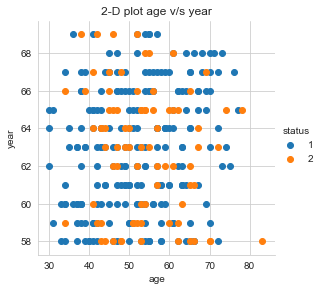

In [34]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="status" , size=4) \
    .map(plt.scatter, 'age', 'year')\
    .add_legend()
plt.title("2-D plot age v/s year")
plt.show()
plt.close()

### Observation:

Data points are highly scattered, We can not able to distinguish between 1 and 2


##  pair plot

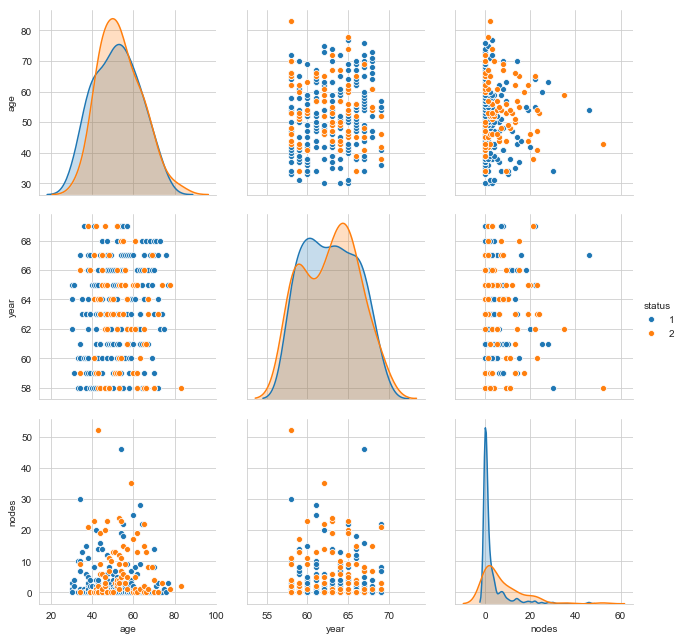

In [81]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status",vars=["age", "year", "nodes"], size=3)
plt.show()

### Observations:

Since there are 3 features (except target variable), 3C2 combinations exists. 

age v/s year:
    
    The range of "year" is from 58 - 69 and "age" varies from 28-81.
    
age v/s nodes:

    Most of the observations of "nodes" are concentrated from 0 - 1 &extended upto 52 approximately, age varies from 30-81.

nodes v/s year:

    Some "nodes" points are plotted at the edge of the graph, they seems like outliers. ex: 52 

After plotting pair-wise, Still no clear insights found from the data 

## Histograms , PDF , CDF 

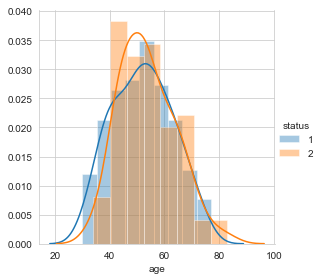

In [82]:
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

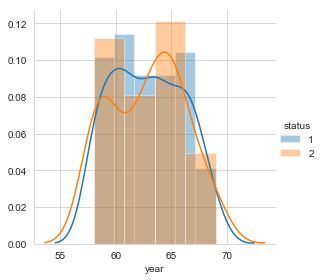

In [83]:
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

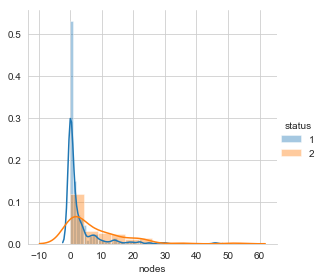

In [84]:
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

### Observations:

After plotting the distribution plots for each variable "age", "year","nodes"

"age" and "year" pdf curves are almost overlapped, which is difficult to classify "status" values(i.e, 1,2)

"nodes" pdf curve is also overlapped but we can bring better insights compared to "age" and "year",

    -> If x>0 &&  x<30 gives "status" 1
    -> If x>0 && x<60 gives "status" 2 

lets look for CDF

## cdf

pdf :  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf :  [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


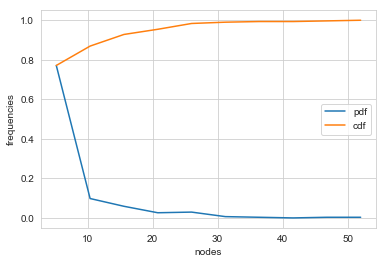

In [85]:
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf : ", pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
print("cdf : ",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(["pdf","cdf"])
plt.xlabel("nodes")
plt.ylabel("frequencies")

plt.show()

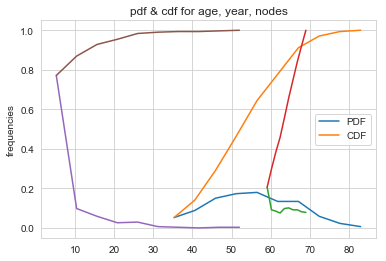

In [86]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

######
counts, bin_edges = np.histogram(haberman['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

######
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(["PDF","CDF"])
plt.ylabel("frequencies")
plt.title("pdf & cdf for age, year, nodes")
plt.show()

### Observation:
    can not able to differentiate "status" labels with the PDF and CDF plot 

## mean , variance & std-deviation

In [87]:
print("mean : ")
display(haberman.mean())

mean : 


age       52.457516
year      62.852941
nodes      4.026144
status     1.264706
dtype: float64

In [88]:
print("standard deviations : ")
print("age : ", np.std(haberman["age"]))
print("year : ",np.std(haberman["year"]))
print("nodes : ",np.std(haberman["nodes"]))

standard deviations : 
age :  10.78578520363183
year :  3.244090833563246
nodes :  7.177896092811152


In [89]:
print("median : ")
print("age : ", np.median(haberman["age"]))
print("year : ",np.median(haberman["year"]))
print("nodes : ",np.median(haberman["nodes"]))

median : 
age :  52.0
year :  63.0
nodes :  1.0


### Observation:

Since, median and mean both describes central tendency,

In this example:

mean & median for "age", "year" both are approximately equal,
but, mean & median for "nodes" is significantly different,

Therefore there are chances of outliers in "nodes" (which will be find )

## median , percentiles , quantiles, IQR , MAD

In [90]:
print("Quantiles : ")
age_quantile = np.percentile(haberman["age"], np.arange(0,100,25))
print("age : ", age_quantile)
year_quantile = np.percentile(haberman["year"], np.arange(0,100,25))
print("year : ",year_quantile)
nodes_quantile =np.percentile(haberman["nodes"], np.arange(0,100,25))
print("nodes : ",nodes_quantile)


Quantiles : 
age :  [30.   44.   52.   60.75]
year :  [58.   60.   63.   65.75]
nodes :  [0. 0. 1. 4.]


In [91]:
haberman[['nodes']].describe().T

,count,mean,std,min,25%,50%,75%,max
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.0,52.0


maximum value in "nodes" is 52, which is irrelevant when compared to the other quantiles

In [92]:
print("IQR  ")
age_IQR = np.percentile(haberman["age"], 75)-np.percentile(haberman["age"],25) 
print("age : ", age_IQR)
year_IQR = np.percentile(haberman["year"], 75)-np.percentile(haberman["year"],25)
print("year : ",year_IQR)
nodes_IQR = np.percentile(haberman["nodes"], 75)-np.percentile(haberman["nodes"], 25)
print("nodes : ",nodes_IQR)

IQR  
age :  16.75
year :  5.75
nodes :  4.0


### Lets derive outliers present in each Variable/ feature

In [93]:
def find_outliers(x,IQR,Q1,Q3):
    if x>(Q3+(1.5*IQR)) or x<(Q1-(1.5*IQR)):
        return True
    return False

age_outliers = list(filter(lambda x:find_outliers(x,age_IQR,age_quantile[1],age_quantile[3]),haberman["age"]))
print("age_outliers : ",age_outliers)

year_outliers = list(filter(lambda x:find_outliers(x,year_IQR,year_quantile[1],year_quantile[3]),haberman["year"]))
print("year_outliers : ",year_outliers)

nodes_outliers = list(filter(lambda x:find_outliers(x,nodes_IQR,nodes_quantile[1],nodes_quantile[3]),haberman["nodes"]))
print("nodes_outliers : ",nodes_outliers)

age_outliers :  []
year_outliers :  []
nodes_outliers :  [30, 13, 15, 21, 11, 23, 20, 52, 14, 19, 16, 14, 20, 23, 12, 11, 11, 13, 13, 24, 12, 11, 23, 46, 19, 15, 18, 22, 14, 35, 17, 25, 13, 19, 28, 22, 22, 15, 13, 14]


### Observations:

--> Outliers are present in "nodes" in range from -6 to 10

In [94]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman["age"]))
print(robust.mad(haberman["year"]))
print(robust.mad(haberman["nodes"]))


Median Absolute Deviation
11.860817748044816
4.447806655516806
1.482602218505602


** From the above observations and plots, Its is difficult to get "status" by differenting between "age" and "year", but "nodes" are giving good information comparitively.

so, Lets plot on "nodes" more.

## Boxplot with Whiskers

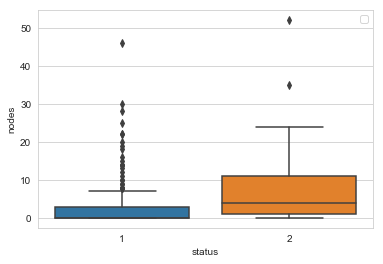

In [95]:
sns.set_style("whitegrid")
sns.boxplot(x='status',y='nodes', data=haberman)
plt.legend("")
plt.show()

### Observation:

The horizantal lines of each box plots represents "five number summary" i.e 1(lower whisker),2,3,4,5(upper whisker) quartiles 
for "status" box-plot 1
    
    1st,2nd,3rd quantiles are 0, 4th quantile is 4, 5th quantile is 8 and remaining upto 48 are outliers.

for "status" box-plot 2

    1st quantile is 0, 2nd quantile is 1 , 3rd quantile is at 4 , 4th quantile is at 11, 5th quantile is at 24(approx) and    remaining upto 52 are outliers.
    

## violin plots

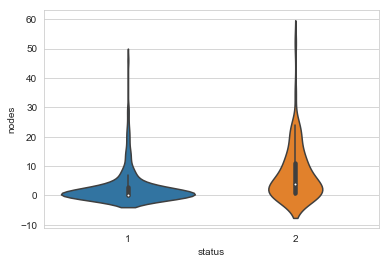

In [96]:
sns.set_style("whitegrid")
sns.violinplot(x='status',y='nodes', data=haberman)
plt.show()

### Observation:

Its a combination of box plot  and density plot.

The side expanded curves represents pdf plots, ranges from 
    
    0 to 48 , white area shows 50% of data lies in 0
    
    ranges from -6 from 52 , white ares shows 50% of data lies in 1

Black region describes box plot.

the upper and lower parts of the figures are upper and lower whiskers

## multivariate probability density ,  Contour plot

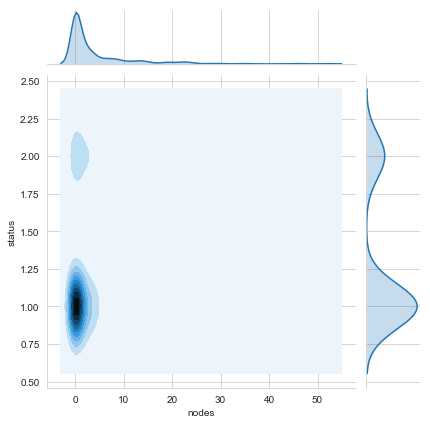

In [97]:
sns.jointplot(x="nodes", y="status",data=haberman, kind="kde")
plt.show()

### Observation:

"status" 1 are more frequent than 2 , so more circles are plotted near 1, 

as the value of "nodes" varies the circle range increases

The upper portion of figure shows density plot for "nodes", which reflect as contours below....

The side portion of figure shows density plots for "status" 1 & 2 which reflects as contours (circles)....

In [99]:

!jupyter nbconvert --to html saikarthikcheedella_1.ipynb

[NbConvertApp] Converting notebook saikarthikcheedella_1.ipynb to html
[NbConvertApp] Writing 615420 bytes to saikarthikcheedella_1.html
